<a href="https://colab.research.google.com/github/rakku-99/iNeuronLabs/blob/main/gc_69_Ada%2C%20Gradient%2CXgBoost_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
len(df['quality'].unique())

6

In [5]:
df['quality'].nunique()

6

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
df.duplicated().sum()


240

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
demo_df=pd.DataFrame([1,2,3,3,23,2,1,2,123,333])

In [12]:
demo_df

,0
0,1
1,2
2,3
3,3
4,23
5,2
6,1
7,2
8,123
9,333


In [13]:
demo_df.duplicated().sum()

4

In [14]:
X=df.drop("quality",axis=1)

In [15]:
y=df['quality']

In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [18]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
scr.fit()
scr.transform()'''


'from sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import StandardScaler\nsclr = StandardScaler()\nscr.fit()\nscr.transform()'

In [19]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [20]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
model.score(X_train,y_train)

1.0

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [23]:
fig.savefig("decistion_tree_classifier.png")

In [24]:
y_predict=model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_predict)

0.5233853006681515

In [27]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [28]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

In [29]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [30]:
grid_searh.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'splitter': 'random'}

In [31]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 6,min_samples_leaf= 4,min_samples_split= 6,splitter='random')

In [32]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=6,
                       splitter='random')

[Text(0.6383196721311475, 0.9285714285714286, 'X[10] <= 11.014\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.39139344262295084, 0.7857142857142857, 'X[6] <= 89.611\ngini = 0.582\nsamples = 669\nvalue = [7, 23, 360, 234, 44, 1]'),
 Text(0.22540983606557377, 0.6428571428571429, 'X[10] <= 9.906\ngini = 0.61\nsamples = 573\nvalue = [7, 23, 273, 226, 43, 1]'),
 Text(0.12295081967213115, 0.5, 'X[1] <= 0.703\ngini = 0.516\nsamples = 306\nvalue = [2, 13, 190, 95, 6, 0]'),
 Text(0.06557377049180328, 0.35714285714285715, 'X[6] <= 54.368\ngini = 0.529\nsamples = 255\nvalue = [2, 8, 151, 88, 6, 0]'),
 Text(0.03278688524590164, 0.21428571428571427, 'X[1] <= 0.344\ngini = 0.563\nsamples = 169\nvalue = [2, 5, 89, 67, 6, 0]'),
 Text(0.01639344262295082, 0.07142857142857142, 'gini = 0.54\nsamples = 21\nvalue = [0, 0, 5, 13, 3, 0]'),
 Text(0.04918032786885246, 0.07142857142857142, 'gini = 0.543\nsamples = 148\nvalue = [2, 5, 84, 54, 3, 0]'),
 Text(0.09836065573770492, 0.214

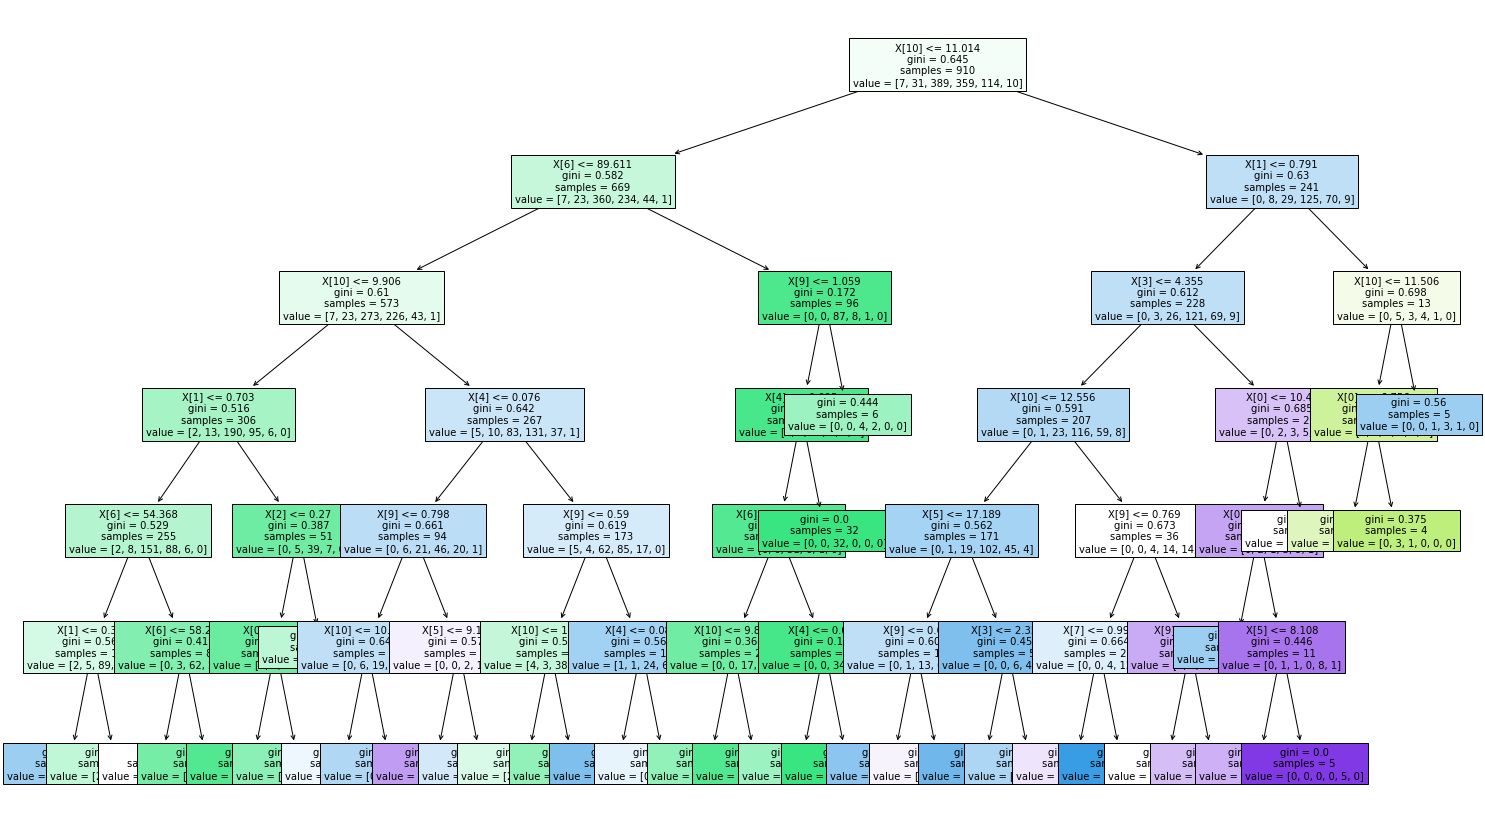

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [34]:
y_prediction2=model_with_best_params.predict(X_test)

In [35]:
accuracy_score(y_test,y_prediction2)

0.532293986636971

In [36]:
#logistic regression, SVM ,  going forward(RF,XB,GB,AB)

#Implement the decision tree regressor
dataset:https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption
        
take_refrence_from_here:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

```
# This is formatted as code
```



In [37]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier()

In [38]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred_rf=Rf_model.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred_rf)

0.6080178173719376

In [41]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [42]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=Rf_model,param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)

In [ ]:
grid_searh.fit(X_train,y_train)

In [ ]:
grid_searh.best_params_

In [ ]:
Rf_model_with_best_params=RandomForestClassifier(criterion='gini',max_depth= 14,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators=115)

In [ ]:
Rf_model_with_best_params.fit(X_train,y_train)

In [ ]:
y_predict_rf_bp=Rf_model_with_best_params.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict_rf_bp)

In [46]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bagging_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=50, random_state=0).fit(X_train,y_train)


In [47]:
y_predict_bagging=model_bagging_svc.predict(X_test)


In [48]:
accuracy_score(y_test,y_predict_bagging)

0.4766146993318486

In [49]:
'''use bagging classiifer and regressor, extra tree classifier and regressor, voting classifer and regressor and random forest classifier and regressor on top of House hold consumpltion data and cencus data
data link: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption
        https://archive.ics.uci.edu/ml/datasets/census+income
sklearn_link:https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble'''

'use bagging classiifer and regressor, extra tree classifier and regressor, voting classifer and regressor and random forest classifier and regressor on top of House hold consumpltion data and cencus data\ndata link: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption\n        https://archive.ics.uci.edu/ml/datasets/census+income\nsklearn_link:https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble'

Ada Boost Classifier

In [50]:
from sklearn.ensemble import AdaBoostClassifier
model_ab=AdaBoostClassifier()

In [51]:
model_ab.fit(X_train,y_train)

AdaBoostClassifier()

In [52]:
y_pred_ab=model_ab.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_ab)

0.5211581291759465

In [54]:
grid_param_ab={
    'n_estimators':[90,100,130,150],
    'learning_rate':[0.001,0.01,0.1,0.5]
}

In [55]:
from sklearn.model_selection import GridSearchCV
grid_search_ab=GridSearchCV(estimator=model_ab,param_grid=grid_param_ab,cv=3,verbose=2,n_jobs=-1)

In [56]:
grid_search_ab.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'n_estimators': [90, 100, 130, 150]},
             verbose=2)

In [57]:
grid_search_ab.best_params_

{'learning_rate': 0.001, 'n_estimators': 90}

In [58]:
model_AB=AdaBoostClassifier(learning_rate= 0.001, n_estimators = 90)

In [59]:
model_AB.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=90)

In [60]:
y_pred_AB=model_AB.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred_AB)

0.5278396436525612

Gradient Boost

In [62]:
# Check GPU Details
!nvidia-smi
#  Tesla T4

Thu Dec  8 16:49:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    31W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb=GradientBoostingClassifier()

In [64]:
model_gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [65]:
y_pred_gb=model_gb.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test,y_pred_gb)

0.576837416481069

In [68]:
from sklearn.model_selection import GridSearchCV

In [80]:
grid_param_gb= {
    'learning_rate':[0.1,0.01,0.001,0.0001],
    'n_estimators':[90,100,115,130],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [81]:
grid_search_gb=GridSearchCV(estimator=model_gb, param_grid=grid_param_gb, cv=5, verbose=2, n_jobs=-1)

In [82]:
grid_search_gb.fit(X_train,y_train)

Fitting 5 folds for each of 41472 candidates, totalling 207360 fits


KeyboardInterrupt: ignored

In [77]:
grid_search_gb.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__criterion', 'estimator__init', 'estimator__learning_rate', 'estimator__loss', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_iter_no_change', 'estimator__random_state', 'estimator__subsample', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

XG Boost

In [20]:
# SkLearn doesnot have XgBoost Library
import xgboost

In [24]:
model_xgb=xgboost.XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred_xgb=model_xgb.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred_xgb)

NameError: ignored

In [ ]:
! pip install optuna

In [42]:
import optuna

In [7]:
X=df.drop("quality",axis=1)
y=df['quality']

In [36]:
def objective_classification(trial,data=X,target=y) :
    train_x , test_x , train_y , test_y= train_test_split(data , target , test_size = .20 ,random_state=10)
    
    param  = {
        'tree_method' :'gpu_hist',
        'verbosity' : 3,
        'objective' : "binary:logistics" , 
        'booster' : trial.suggest_categorical('booster' , ['dart' , 'gbtree','gblinear']),
        'lambda' : trial.suggest_float('lambda' , 1e-4 , 1),
        'alpha' :trial.suggest_float('alpha' , 1e-4 , 1),
        'subsample' : trial.suggest_float('subsample' , .1,.5),
        'colsample_bytree' : trial.suggest_float('colsample_bytree' , .1 ,.5) 
    }
   
    if param['booster'] in ['gbtree' , 'dart']:
        param['gamma'] :trial.suggest_float('gamma' , 1e-3 , 4 )
        param['eta'] : trial.suggest_float('eta' , .001 ,5 )
        
    xgb_classification = xgboost.XGBClassifier(**param)
    xgb_classification.fit(train_x , train_y,eval_set  = [(test_x, test_y)])
    pred = xgb_classification.predict(test_x)
    accuracy  = xgb_classification.score(test_x , test_y)

    return accuracy

In [16]:
xgb_classification_oputuna = optuna.create_study() # direction='minimize)

[I 2022-12-08 18:22:57,971] A new study created in memory with name: no-name-697a05fb-260f-4f06-b653-1197a8a406fa


In [ ]:
xgb_classification_oputuna.optimize(objective_classification , n_trials = 10 )

In [31]:
xgb_classification_oputuna.best_trial

FrozenTrial(number=2, values=[0.471875], datetime_start=datetime.datetime(2022, 12, 8, 18, 28, 14, 826161), datetime_complete=datetime.datetime(2022, 12, 8, 18, 28, 15, 254046), params={'booster': 'gblinear', 'lambda': 0.7498473134321364, 'alpha': 0.7661506589162442, 'subsample': 0.34321876190793654, 'colsample_bytree': 0.11677970774510978}, distributions={'booster': CategoricalDistribution(choices=('dart', 'gbtree', 'gblinear')), 'lambda': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'alpha': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'subsample': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'colsample_bytree': FloatDistribution(high=0.5, log=False, low=0.1, step=None)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=2, state=TrialState.COMPLETE, value=None)

In [32]:
param=xgb_classification_oputuna.best_trial.params

In [38]:
param

{'booster': 'gblinear',
 'lambda': 0.7498473134321364,
 'alpha': 0.7661506589162442,
 'subsample': 0.34321876190793654,
 'colsample_bytree': 0.11677970774510978}

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [39]:
xgb_final_class=xgboost.XGBClassifier(**param)
xgb_final_class.fit(X_train,y_train)

XGBClassifier(alpha=0.7661506589162442, booster='gblinear',
              colsample_bytree=0.11677970774510978, lambda=0.7498473134321364,
              objective='multi:softprob', subsample=0.34321876190793654)

In [40]:
y_pred_xgb=xgb_final_class.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_xgb)

0.4810606060606061